# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'ECON_0150/'
os.chdir(drive_path + project_folder)

In [ ]:
# Check which files are in your Project folder
os.listdir()

['Copy of Welcome_Demo.ipynb',
 'Copy of Exercise_1_0.ipynb',
 'Copy of Exercise_1_4.ipynb',
 'Copy of Exercise_1_5.ipynb',
 'Copy of Homework_2_1.ipynb',
 'Copy of Exercise_2_3.ipynb',
 'My Project.ipynb',
 'usa_00041_sample.csv',
 'health_ineq_online_table_2.csv']

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data = pd.read_csv('health_ineq_online_table_2.csv')
#print data
data.head()


,gnd,pctile,year,count,hh_inc,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,2001,398740,499.10938,79.682068,79.893463,0.392838,0.385240
1,F,1,2002,411159,541.30695,79.183594,79.410622,0.353981,0.346817
2,F,1,2003,420298,529.13910,79.364410,79.572174,0.364780,0.359097
3,F,1,2004,427728,499.29950,79.898407,80.092476,0.352018,0.347992
4,F,1,2005,433665,474.14536,80.283600,80.465935,0.334612,0.330986


## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

<Axes: xlabel='hh_inc', ylabel='le_agg'>

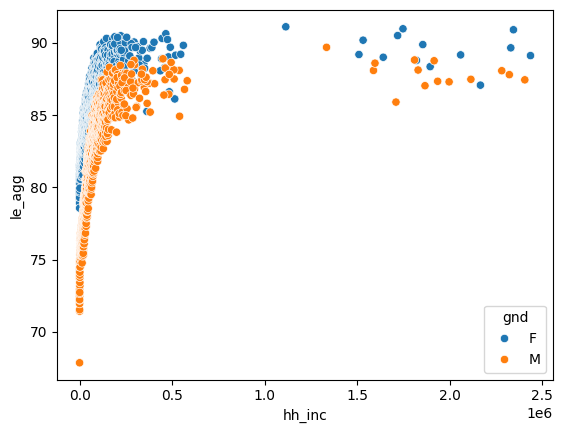

In [ ]:
#question: Is higher household income associated with a longer life expectancy?
#scatter plot of household income and life expectancy
sns.scatterplot(data=data, x='hh_inc', y='le_agg', hue="gnd")

<Axes: xlabel='log_hh_inc', ylabel='Count'>

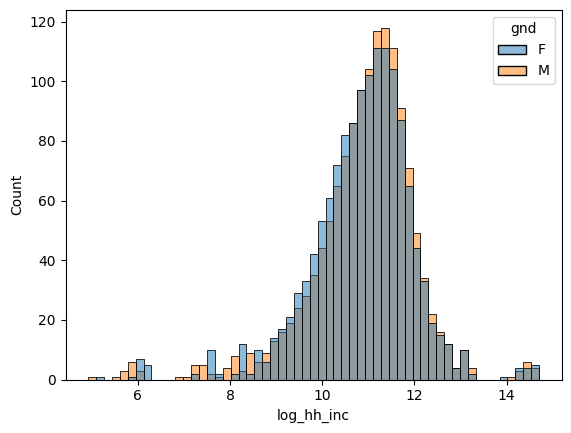

In [ ]:
data['log_hh_inc'] = np.log(data['hh_inc'])
data['log_le'] = np.log(data['le_agg'])

sns.histplot(data=data, x="log_hh_inc", hue='gnd')

Text(0.5, 1.0, 'Life expectancy')

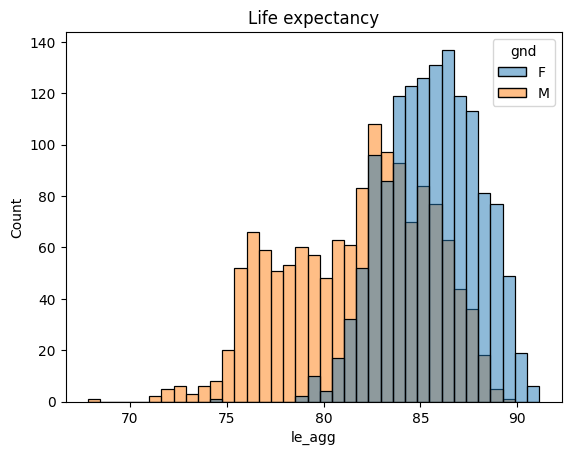

In [ ]:
#histogram of life expectancy
sns.histplot(data=data, x='le_agg', hue='gnd')
plt.title('Life expectancy')

## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

<Axes: xlabel='log_hh_inc', ylabel='le_agg'>

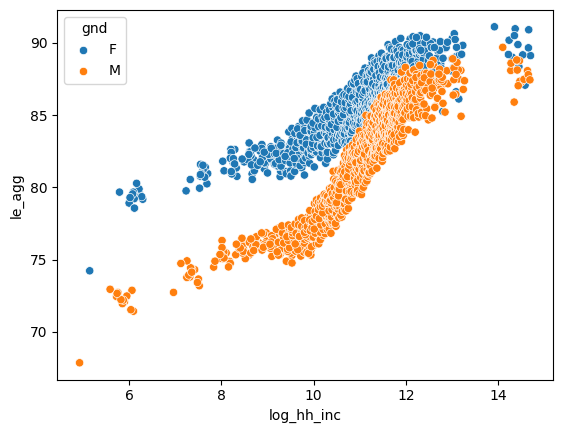

In [ ]:
#convert household income to log
data['log_hh_inc'] = np.log(data['hh_inc'])

#scatterplot of log household income and life expectancy
sns.scatterplot(data=data, x='log_hh_inc', y='le_agg', hue='gnd')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
model = smf.ols(formula='le_agg ~ log_hh_inc + gnd + log_hh_inc:gnd', data=data).fit()

#summary table
print(model.summary().tables[1])

                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              66.1240      0.355    186.057      0.000      65.427      66.821
gnd[T.M]              -15.9532      0.496    -32.154      0.000     -16.926     -14.980
log_hh_inc              1.7893      0.033     54.966      0.000       1.726       1.853
log_hh_inc:gnd[T.M]     1.1034      0.045     24.329      0.000       1.015       1.192


In [ ]:
#intercept coef: base predicted life expectancy for females is 66
#gender: males live on average 15 years less than females, their base predicted life expectancy is 51
#log_hh_inc(1.79): for a 1% log(1) increase in income, that equates to a 0.018 yrs, which is 6.6 days inc in life expectancy for females
#gen and income(1.79+1.10=2.89): for a 1% log(1) inc in income, male life expectancy inc on average 0.029 yrs, which is 10.6 days


Text(36.83400694444445, 0.5, 'Life Expectancy')

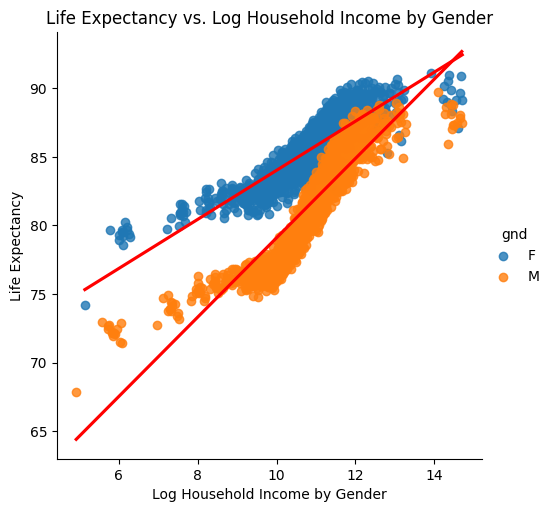

In [ ]:
#log scatterplot with regression line, now including gender
sns.lmplot(data=data, x='log_hh_inc', y='le_agg', hue='gnd', line_kws={'color': 'red'}, ci=None)
title = 'Life Expectancy vs. Log Household Income by Gender'
plt.title(title)
#axis titles
plt.xlabel('Log Household Income by Gender')
plt.ylabel('Life Expectancy')


Text(0.5, 1.0, 'Residuals vs. Fitted Values')

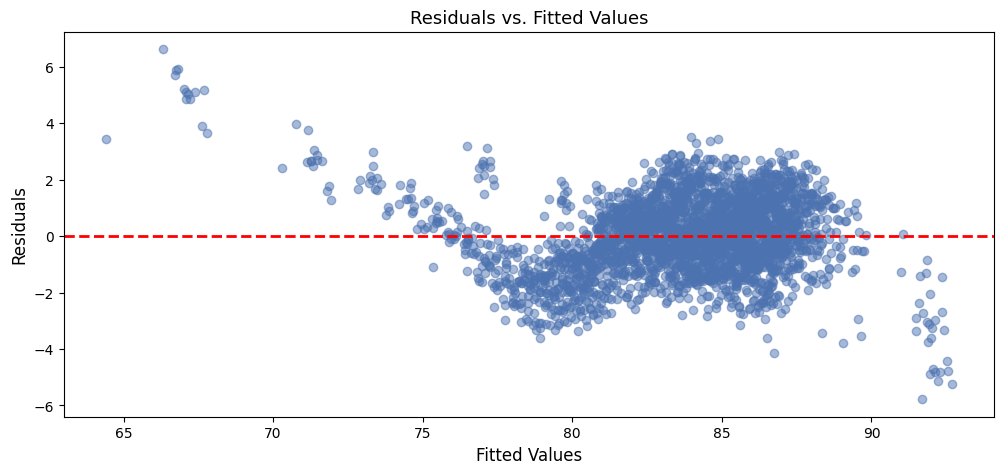

In [ ]:
#Residual plot: the residuals appear to be somewhat randomly scattered around zero, which is a good sign. There isn't a strong, obvious pattern like a curve, which suggests that the linear model captures the relationship reasonably well.
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
residuals_area = model.resid
predictions_area = model.fittedvalues
ax1.scatter(predictions_area, residuals_area, alpha=0.5, color='#4C72B0')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Fitted Values', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)
ax1.set_title('Residuals vs. Fitted Values', fontsize=13)